# House Price - Data Exploration
## Data Description

In [10]:
# CSV reading
import pandas as pd
data = pd.read_csv("train.csv", delimiter=',')

In [11]:
# Data types
pd.set_option('display.max_rows', 100)
data.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
BsmtQual          object
BsmtCond          object
BsmtExposure      object
BsmtFinType1      object
BsmtFinSF1         int64
BsmtFinType2      object
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
Heating           object


In [12]:
# Data description
print(data.describe(include='all'))

                 Id   MSSubClass MSZoning  LotFrontage        LotArea Street  \
count   1460.000000  1460.000000     1460  1201.000000    1460.000000   1460   
unique          NaN          NaN        5          NaN            NaN      2   
top             NaN          NaN       RL          NaN            NaN   Pave   
freq            NaN          NaN     1151          NaN            NaN   1454   
mean     730.500000    56.897260      NaN    70.049958   10516.828082    NaN   
std      421.610009    42.300571      NaN    24.284752    9981.264932    NaN   
min        1.000000    20.000000      NaN    21.000000    1300.000000    NaN   
25%      365.750000    20.000000      NaN    59.000000    7553.500000    NaN   
50%      730.500000    50.000000      NaN    69.000000    9478.500000    NaN   
75%     1095.250000    70.000000      NaN    80.000000   11601.500000    NaN   
max     1460.000000   190.000000      NaN   313.000000  215245.000000    NaN   

       Alley LotShape LandContour Utili

In [13]:
# Missing data
print(round(data.isnull().sum()*100/len(data),2).sort_values(ascending=False))

PoolQC           99.52
MiscFeature      96.30
Alley            93.77
Fence            80.75
FireplaceQu      47.26
LotFrontage      17.74
GarageCond        5.55
GarageType        5.55
GarageYrBlt       5.55
GarageFinish      5.55
GarageQual        5.55
BsmtExposure      2.60
BsmtFinType2      2.60
BsmtFinType1      2.53
BsmtCond          2.53
BsmtQual          2.53
MasVnrArea        0.55
MasVnrType        0.55
Electrical        0.07
Utilities         0.00
YearRemodAdd      0.00
MSSubClass        0.00
Foundation        0.00
ExterCond         0.00
ExterQual         0.00
Exterior2nd       0.00
Exterior1st       0.00
RoofMatl          0.00
RoofStyle         0.00
YearBuilt         0.00
LotConfig         0.00
OverallCond       0.00
OverallQual       0.00
HouseStyle        0.00
BldgType          0.00
Condition2        0.00
BsmtFinSF1        0.00
MSZoning          0.00
LotArea           0.00
Street            0.00
Condition1        0.00
Neighborhood      0.00
LotShape          0.00
LandContour

## Numerical/Categorical Separation

In [19]:
# Some attributes have numerical values that could be considered as categorical
attributes_fakenumerical = []
attributes_fakenumerical.append("MSSubClass")
attributes_fakenumerical.append("OverallQual")
attributes_fakenumerical.append("OverallCond")
#attributes_fakenumerical.append("BsmtFullBath")
#attributes_fakenumerical.append("BsmtHalfBath")
#attributes_fakenumerical.append("FullBath")
#attributes_fakenumerical.append("HalfBath")
#attributes_fakenumerical.append("BedroomAbvGr")
#attributes_fakenumerical.append("KitchenAbvGr")
#attributes_fakenumerical.append("TotRmsAbvGrd")
#attributes_fakenumerical.append("Fireplaces")
#attributes_fakenumerical.append("GarageCars")
#attributes_fakenumerical.append("MoSold")
#attributes_fakenumerical.append("YrSold")

In [20]:
# We split the attributes between two data frames : numerical and categorical
data_categorical = pd.DataFrame()
data_numerical = pd.DataFrame()

for attribute in data.columns:
    if data[attribute].dtypes == "object":
        data_categorical[attribute] = data[attribute]
    else:
        data_numerical[attribute] = data[attribute]
        
for attribute in attributes_fakenumerical:
    data_categorical[attribute] = data[attribute]
    data_numerical = data_numerical.drop(attribute,axis=1)

# We add the target to both data frames
data_categorical["SalePrice"] = data.SalePrice
data_numerical["SalePrice"] = data.SalePrice

## Visualization

### Categorical

In [21]:
# Function to plot a sorted box plot
def boxplot_sorted(df, by, column):
    df2 = pd.DataFrame({col:vals[column] for col, vals in df.groupby(by)})
    meds = df2.median().sort_values()
    return df2[meds.index].boxplot(figsize=(15,5))

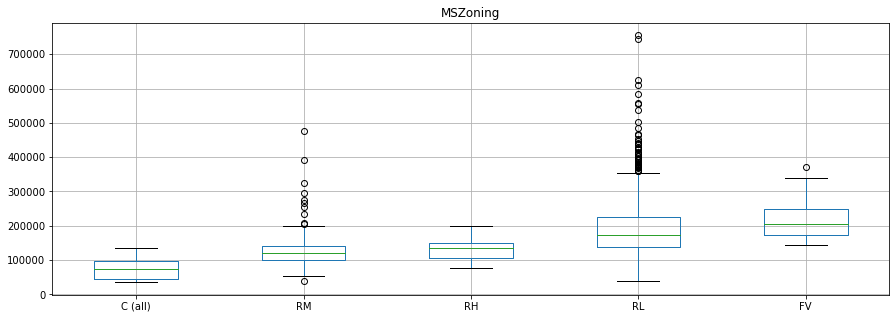

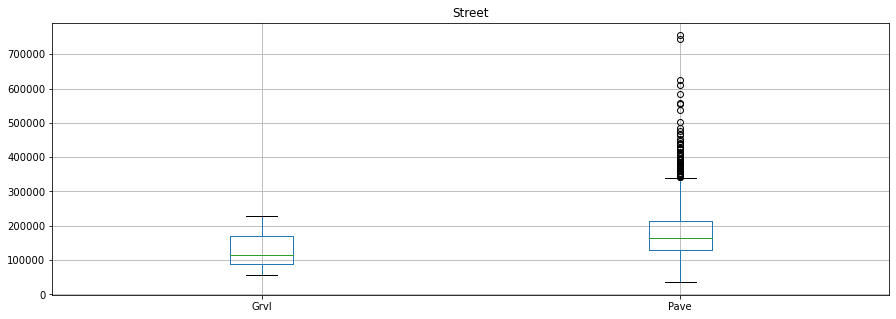

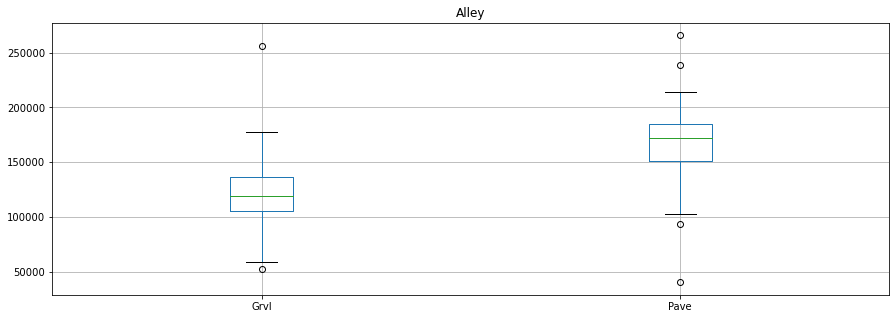

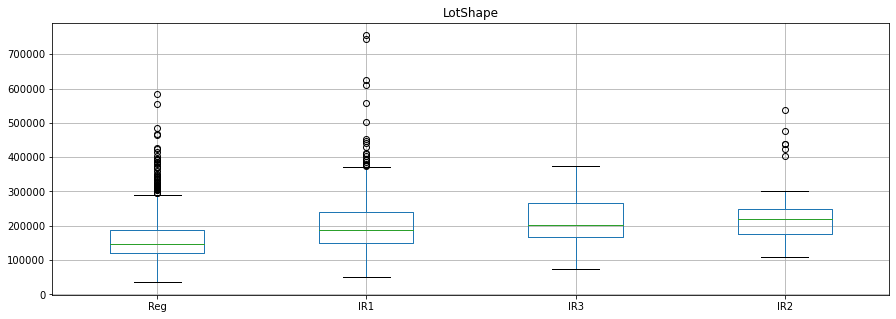

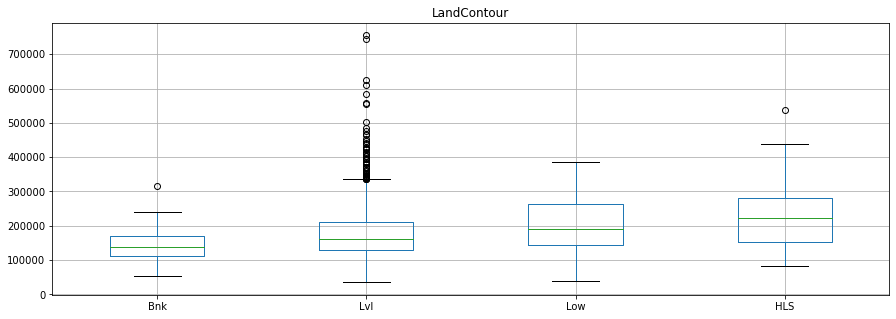

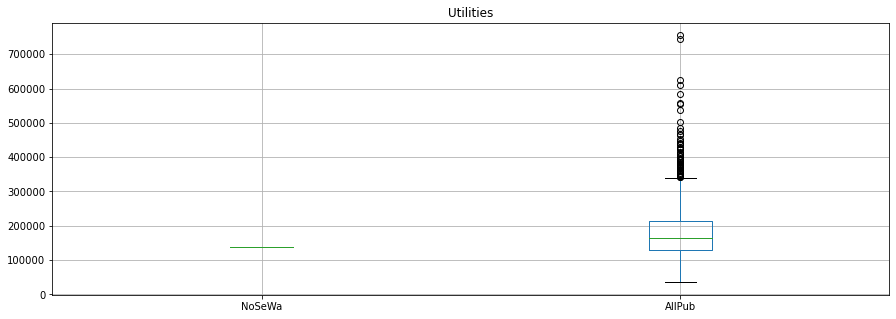

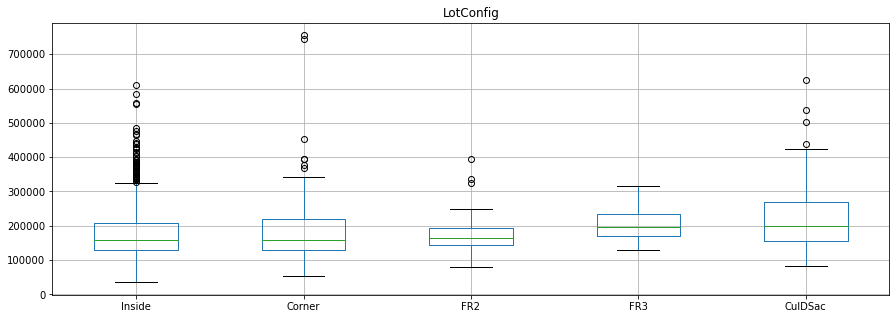

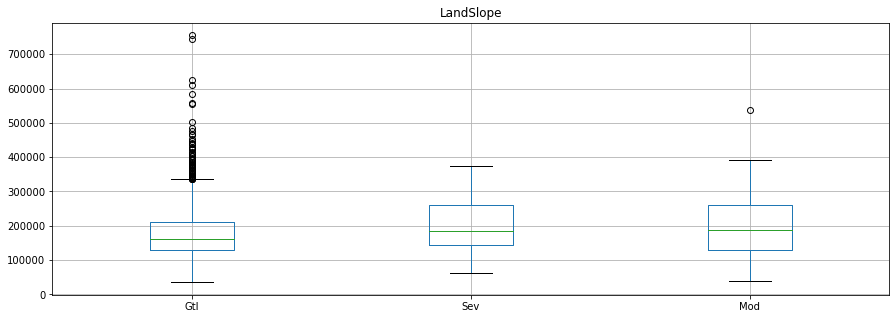

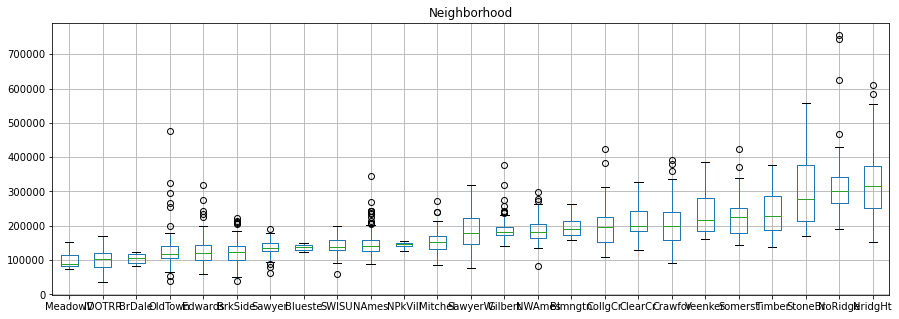

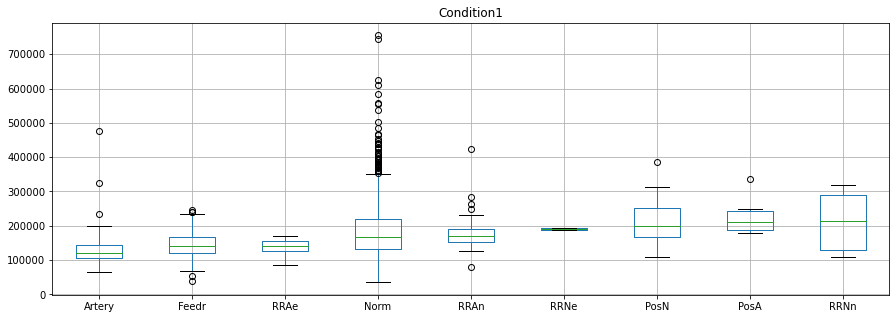

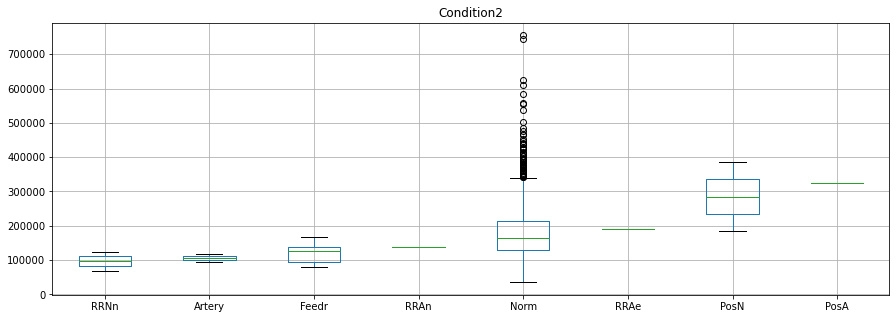

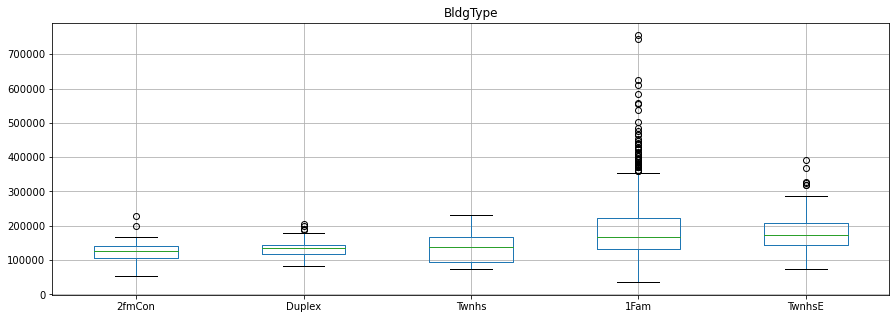

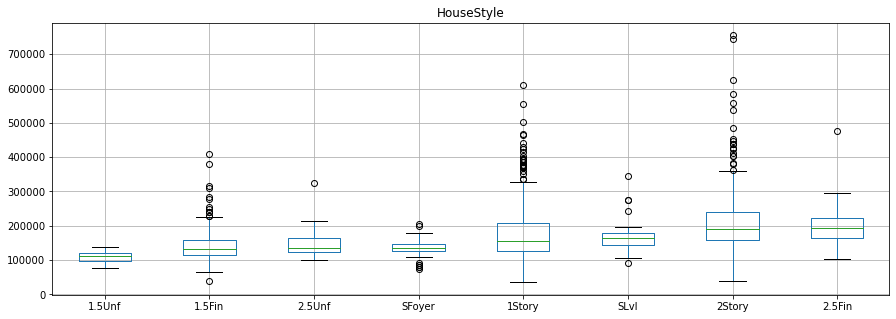

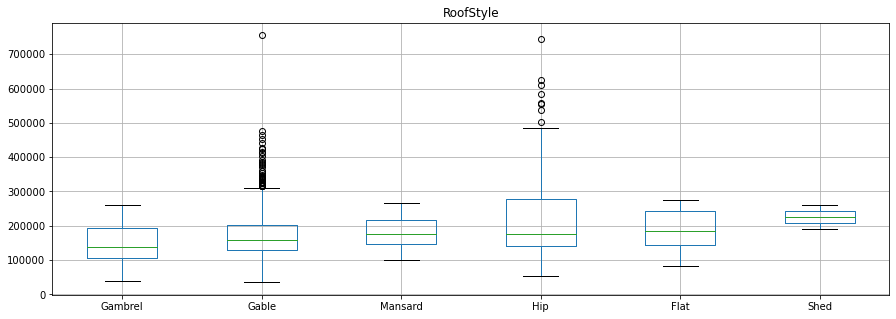

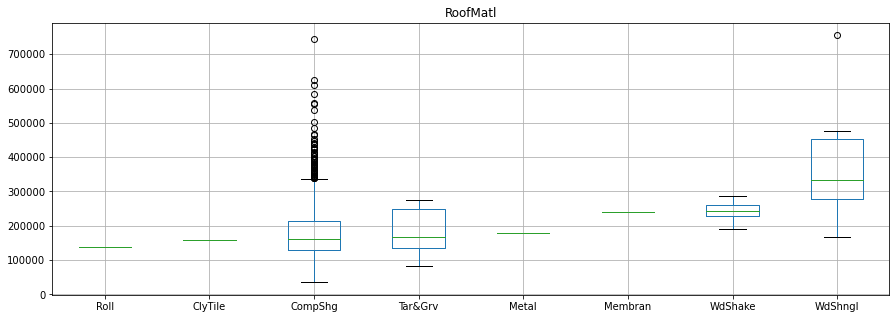

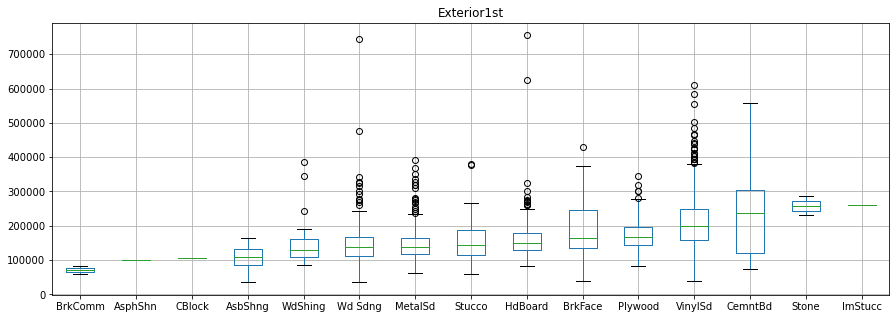

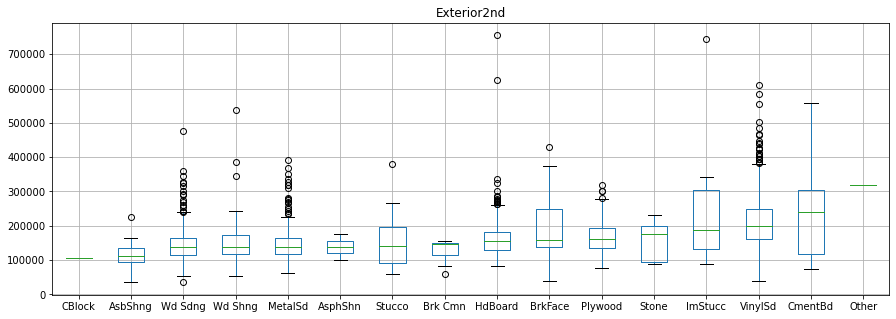

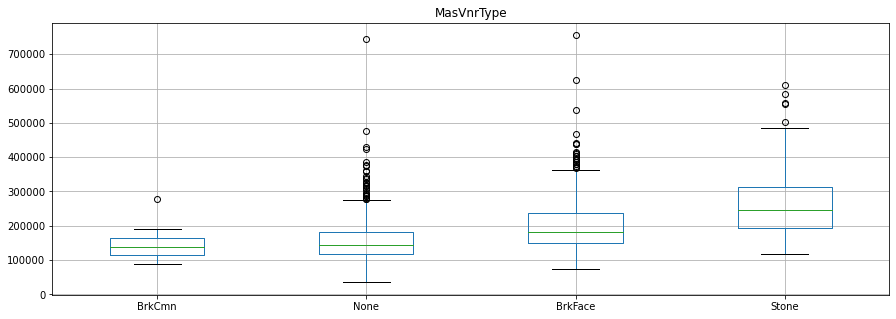

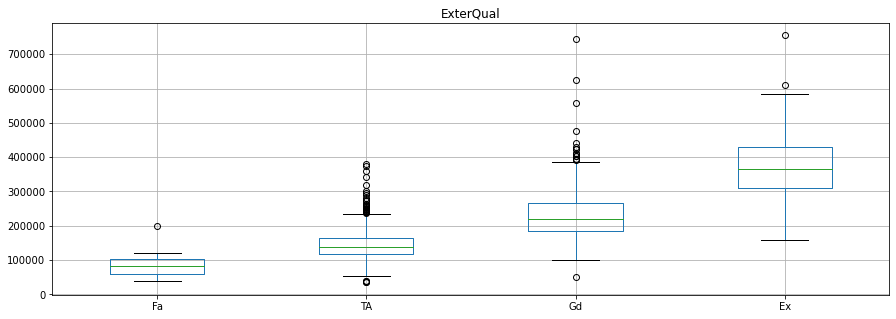

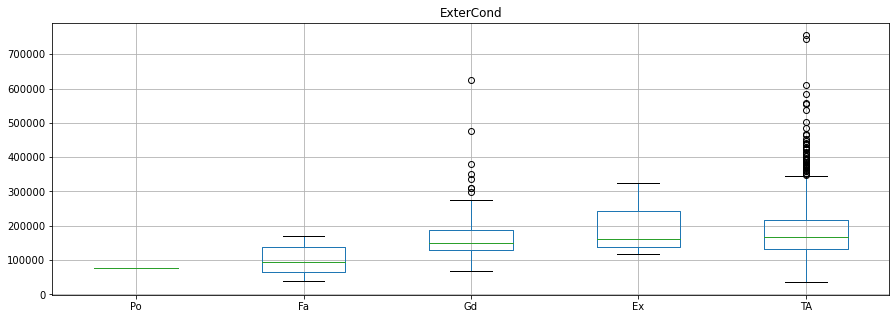

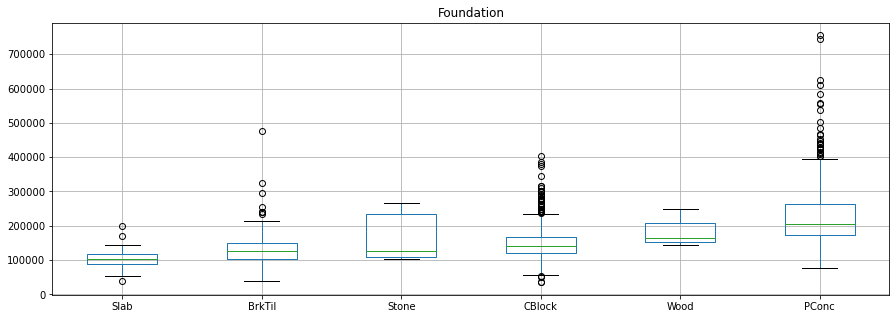

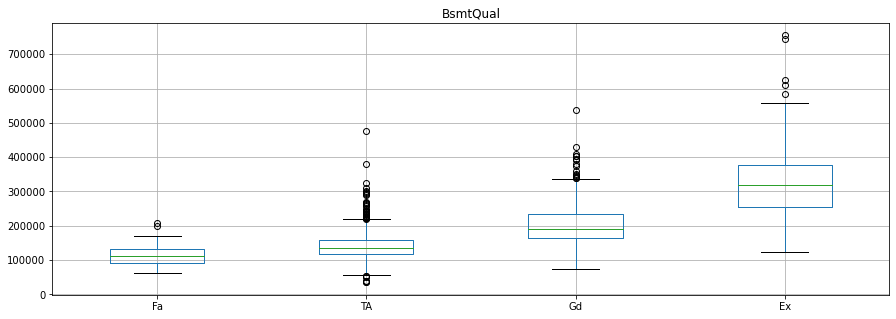

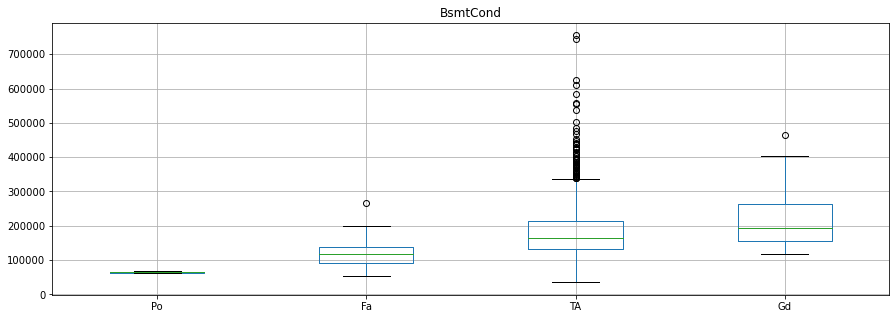

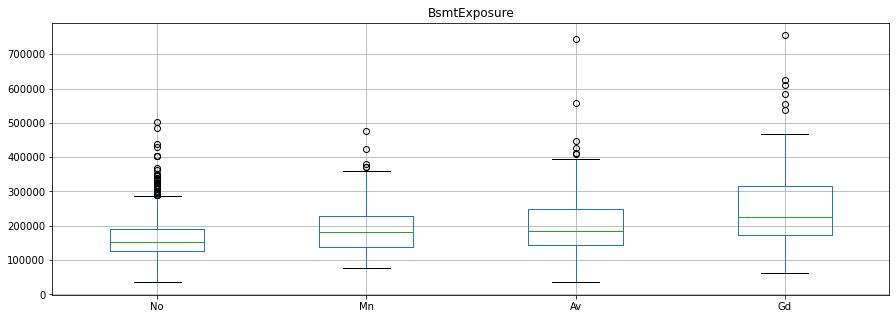

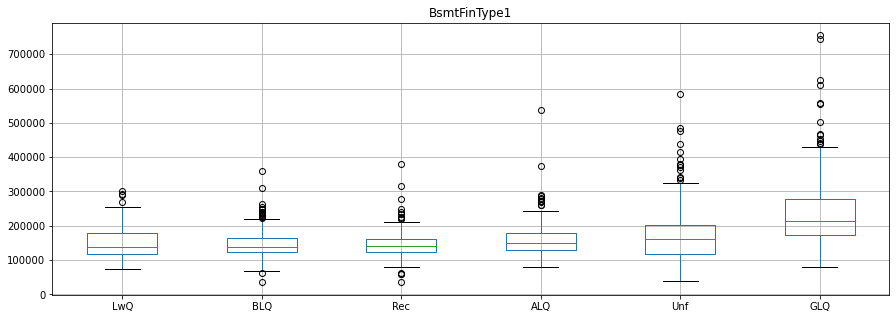

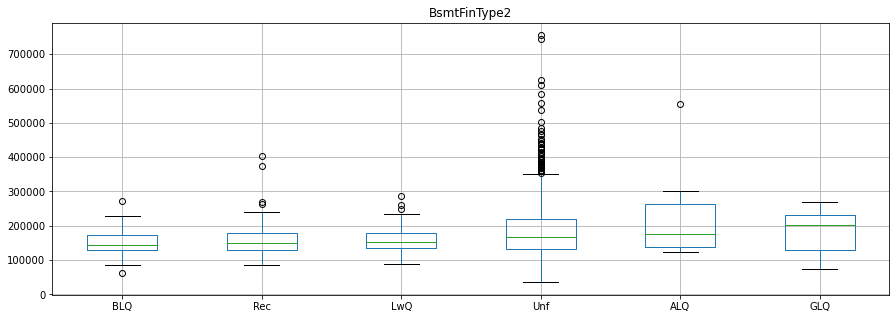

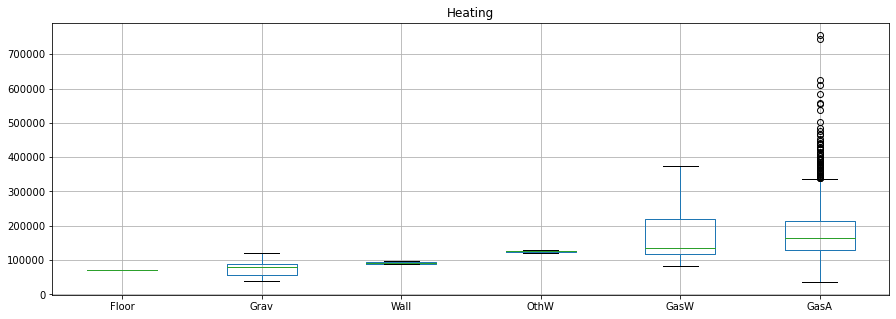

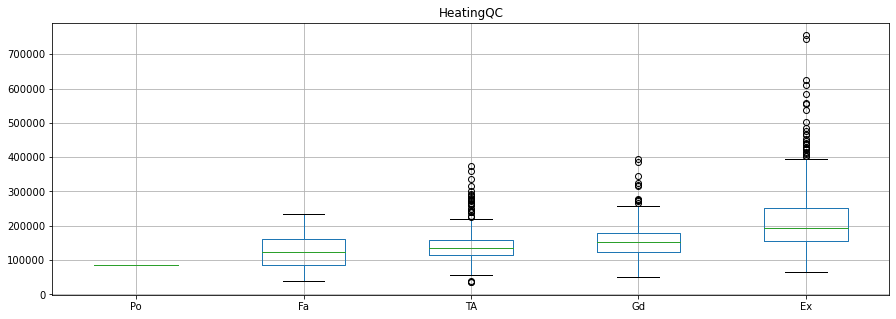

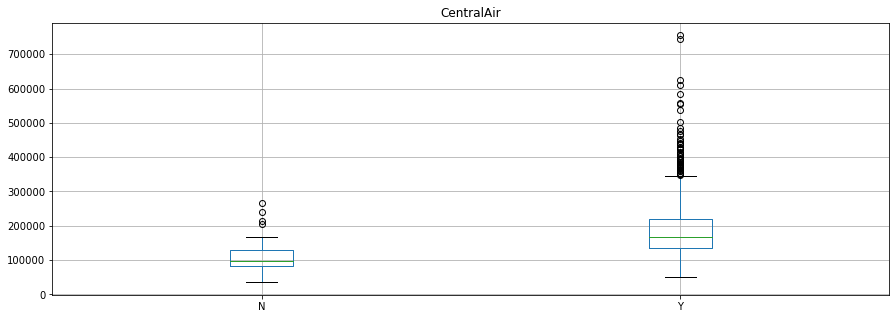

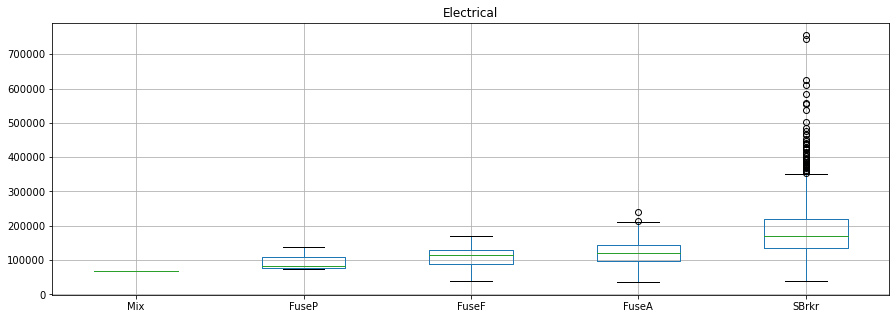

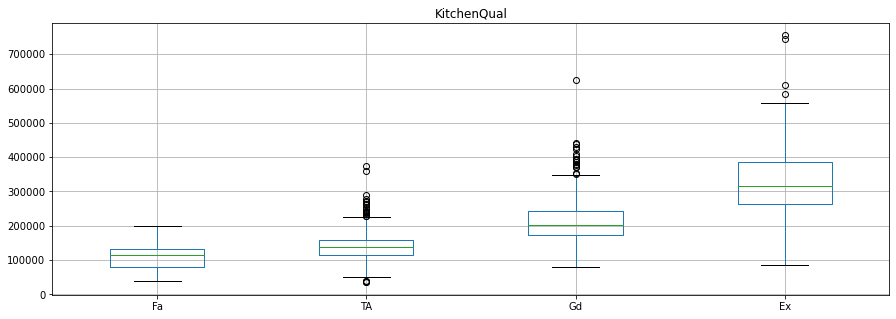

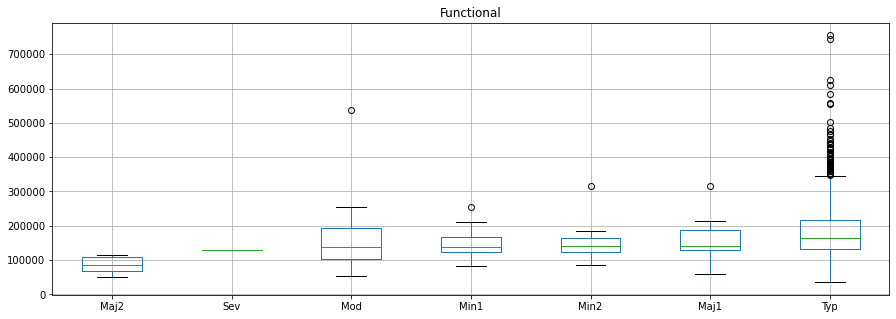

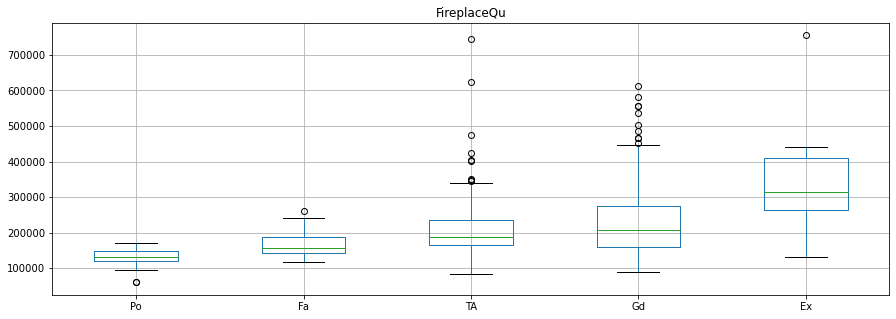

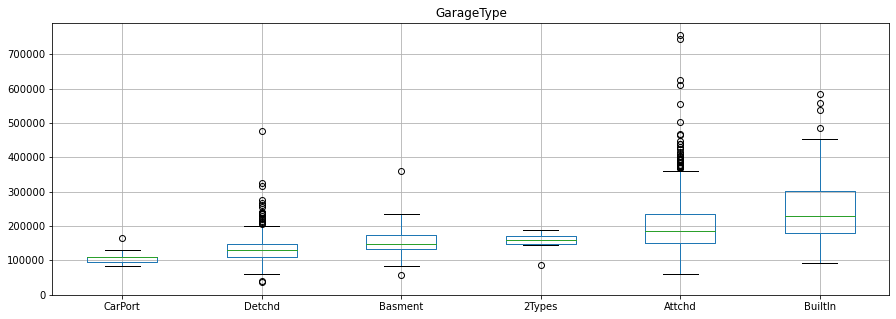

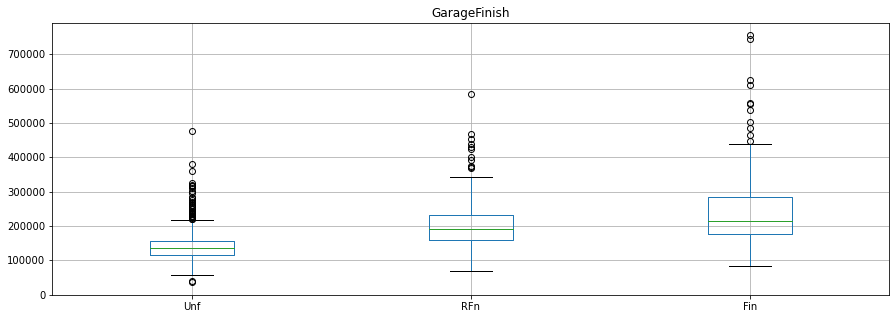

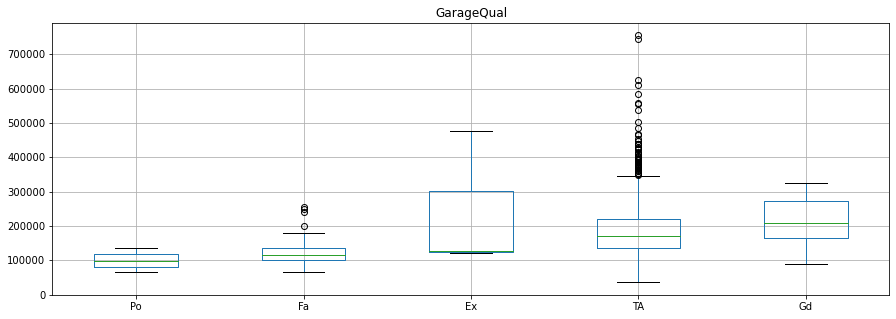

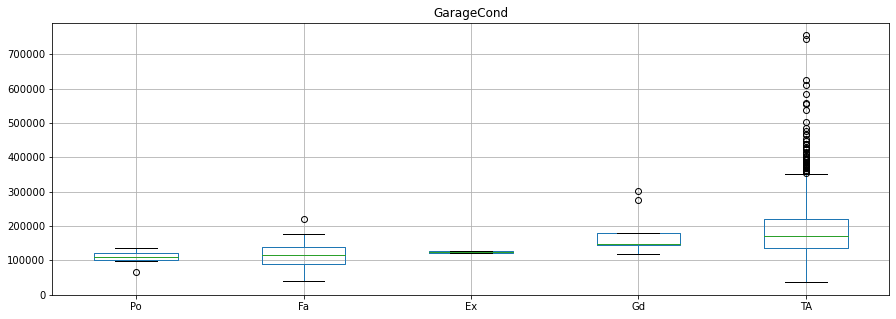

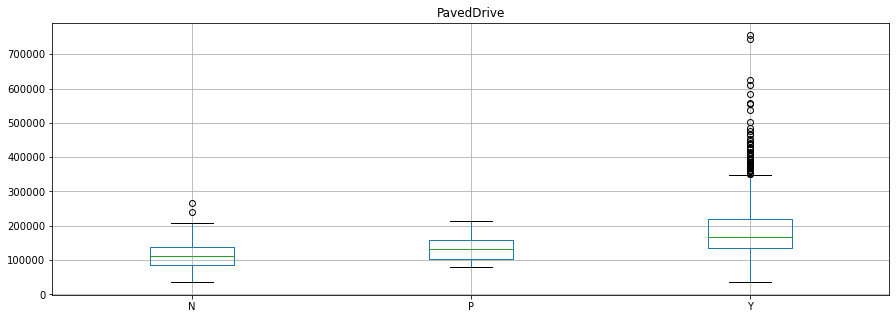

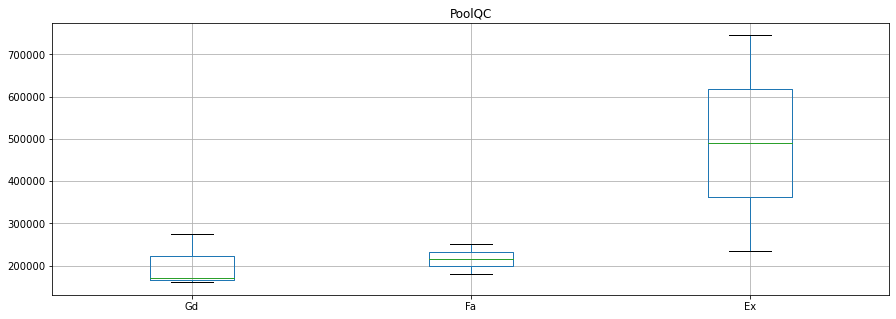

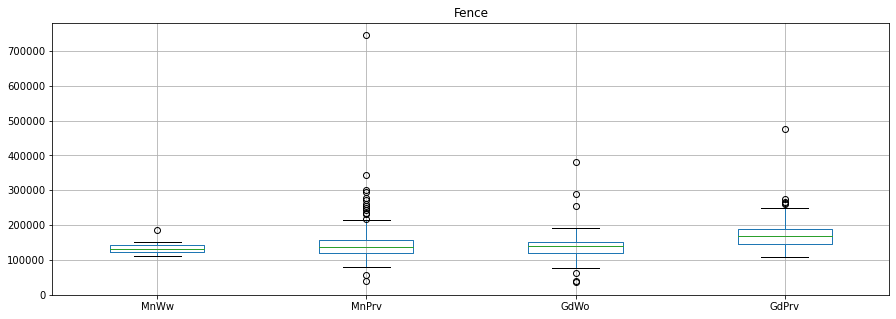

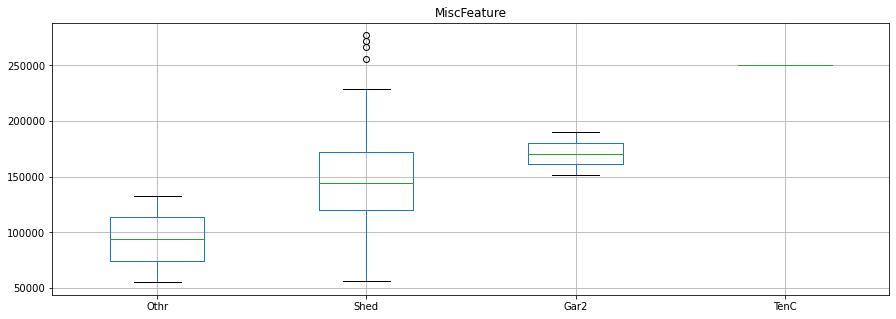

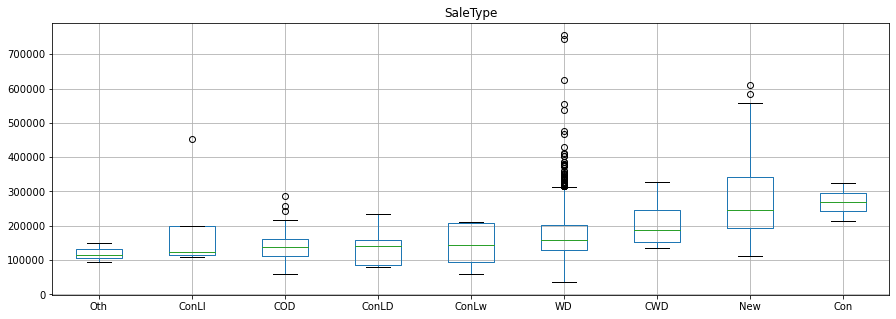

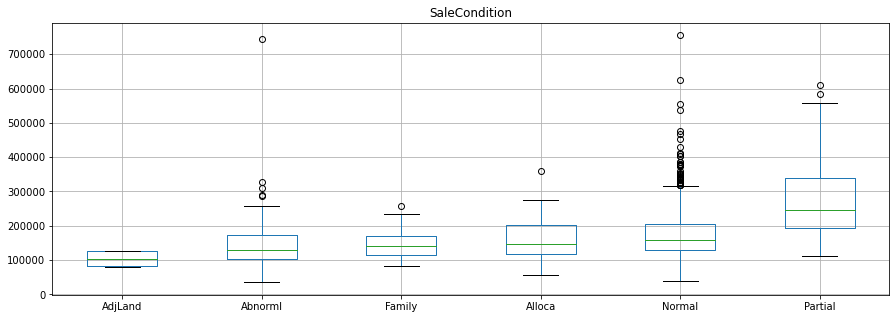

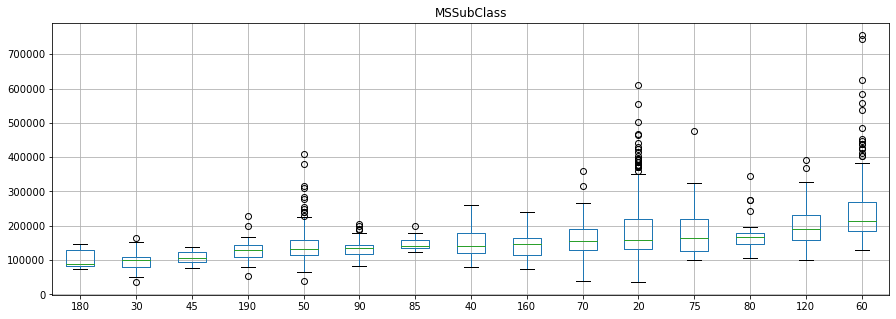

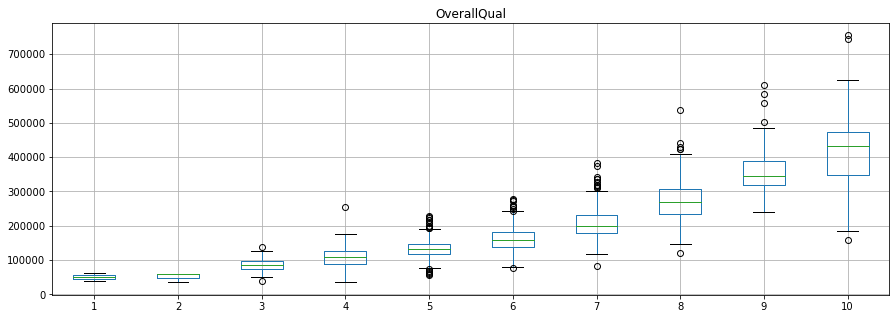

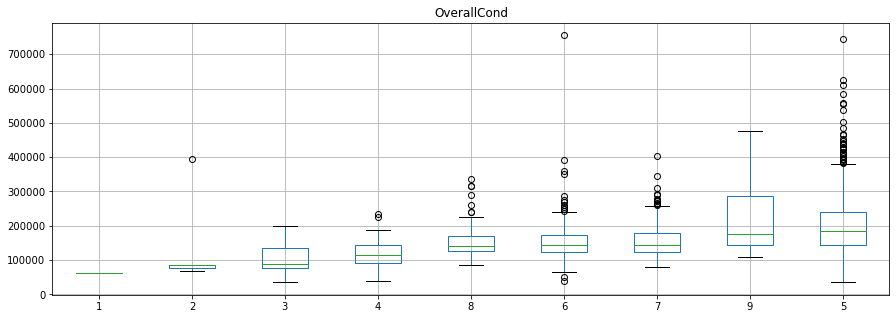

In [22]:
import matplotlib.pyplot as plt 

for attribute in data_categorical.columns:
    if attribute != "SalePrice":
        boxplot_sorted(data_categorical, by = [attribute], column = "SalePrice")
        plt.title(attribute)
        plt.show()

### Numerical

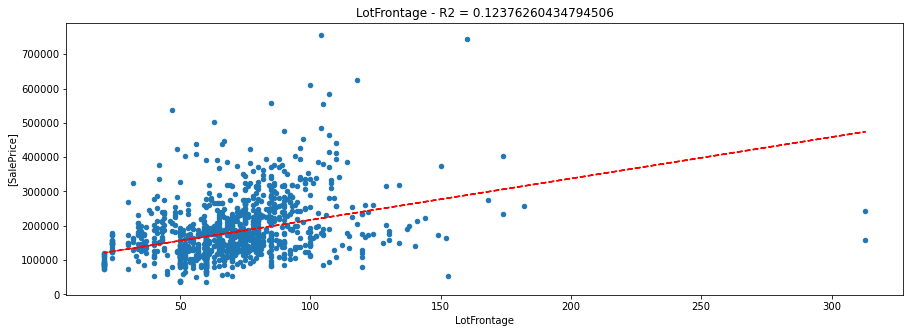

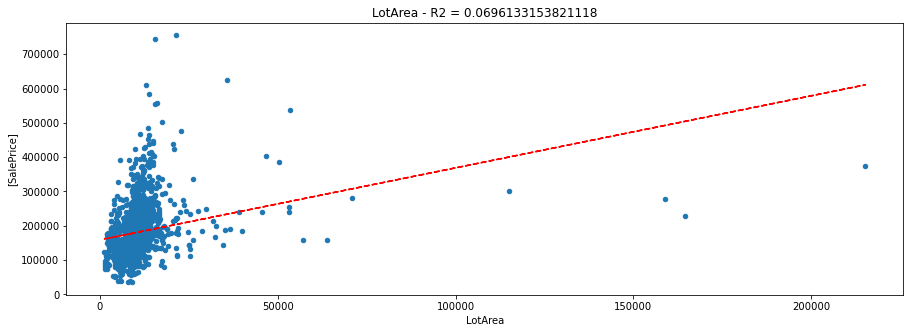

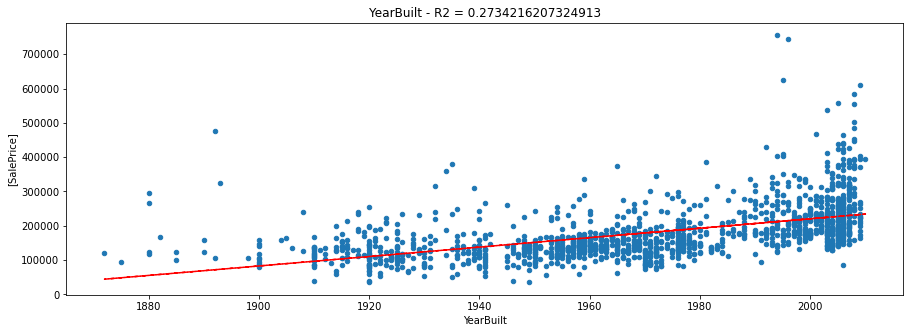

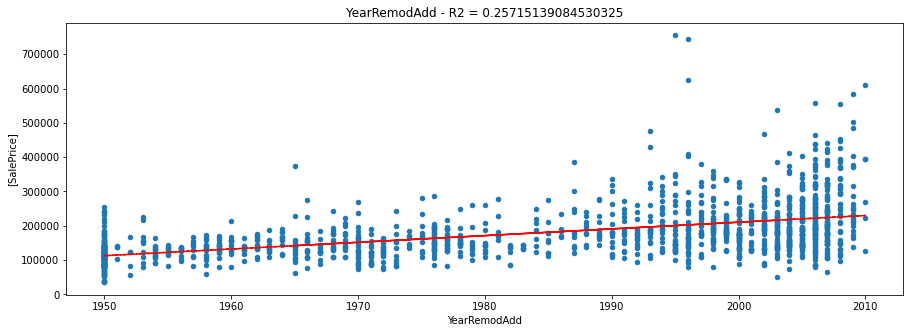

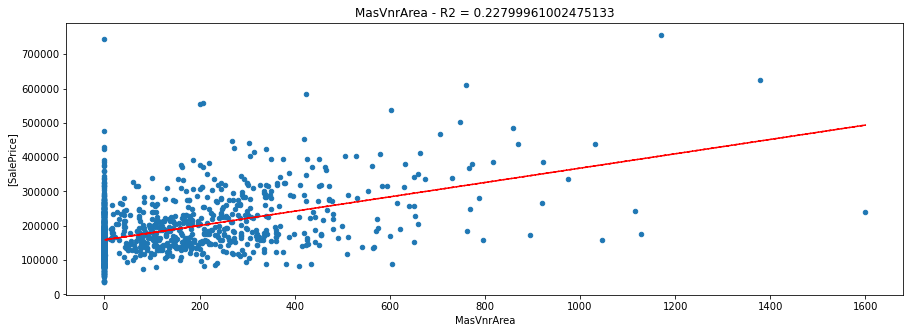

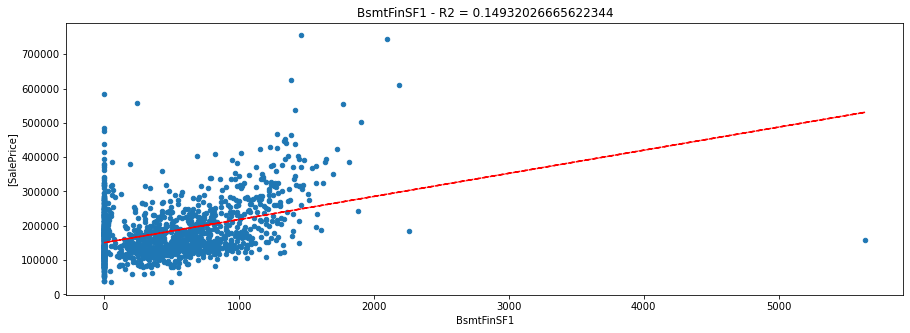

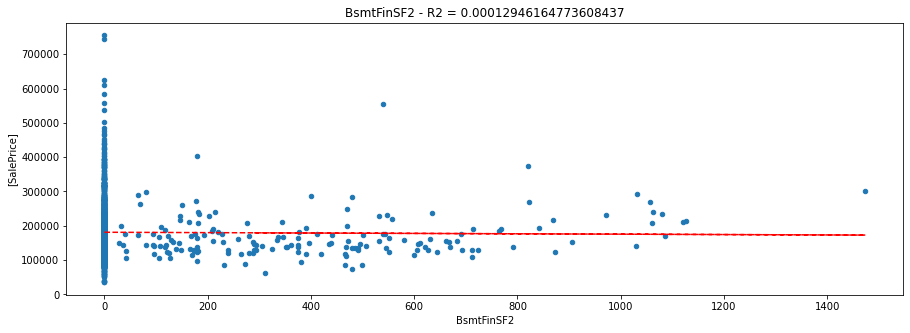

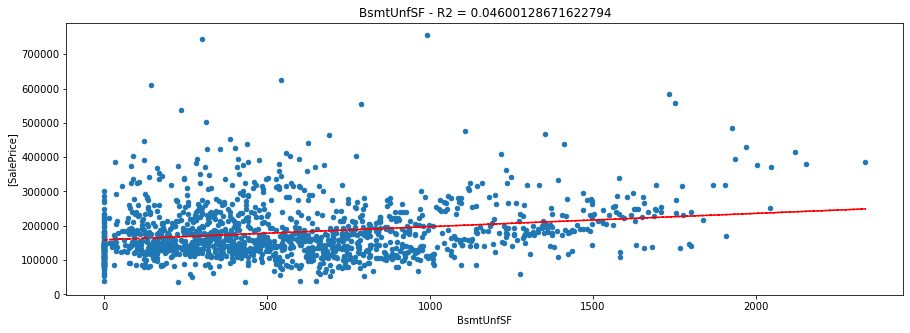

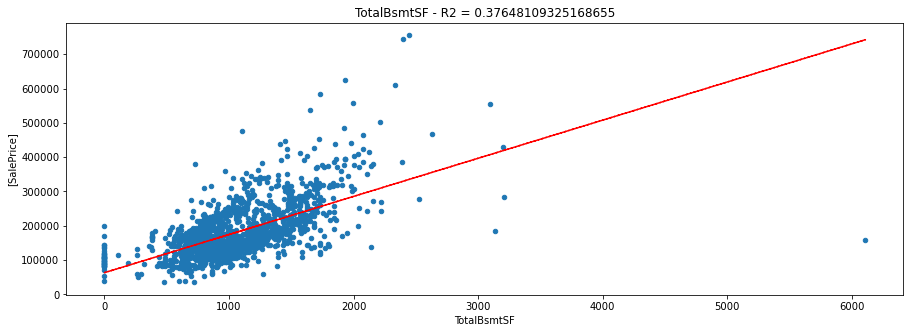

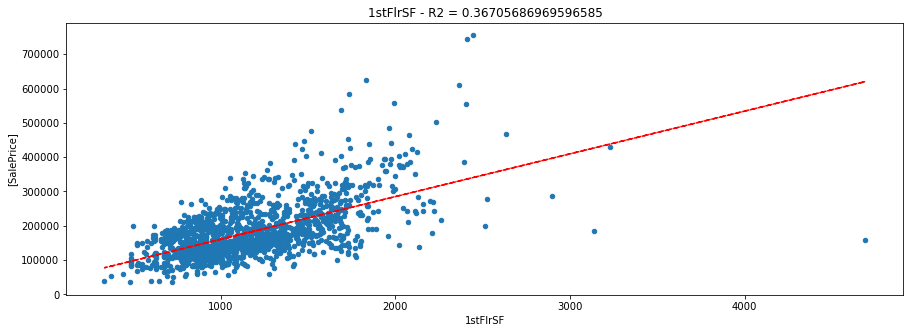

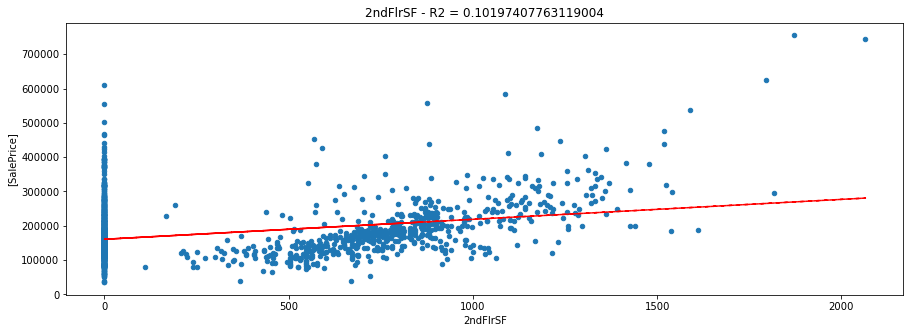

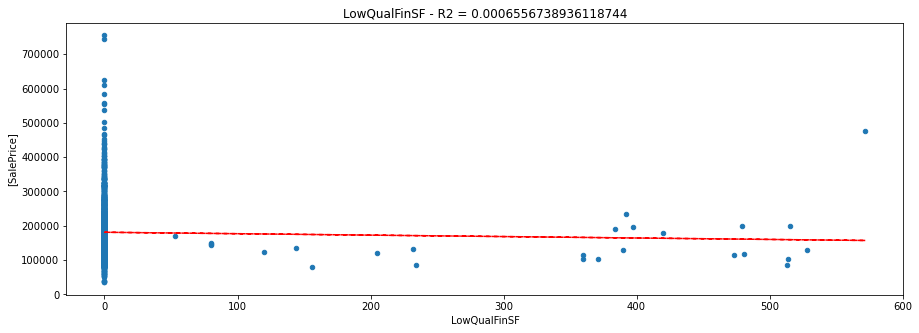

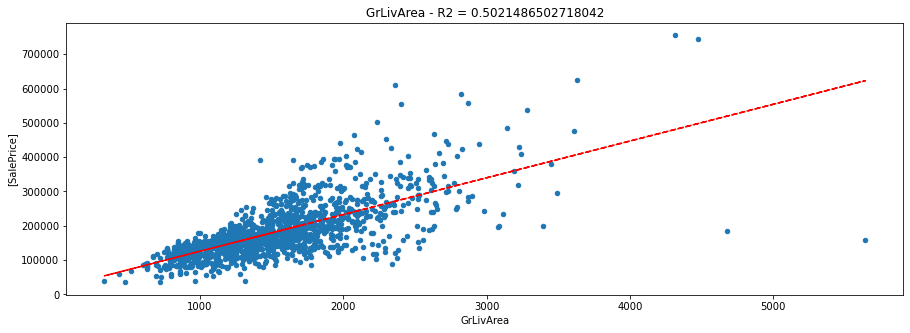

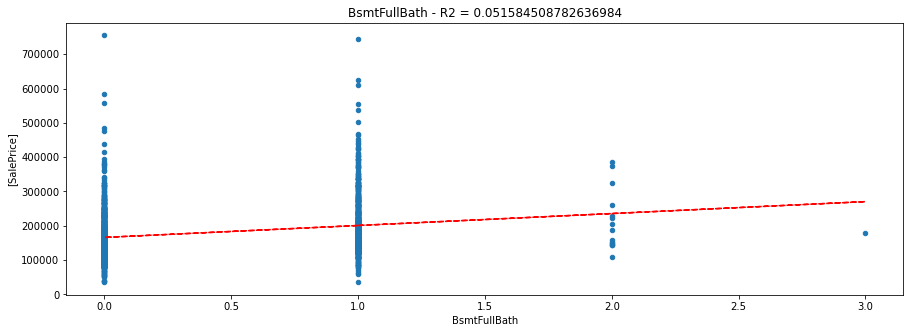

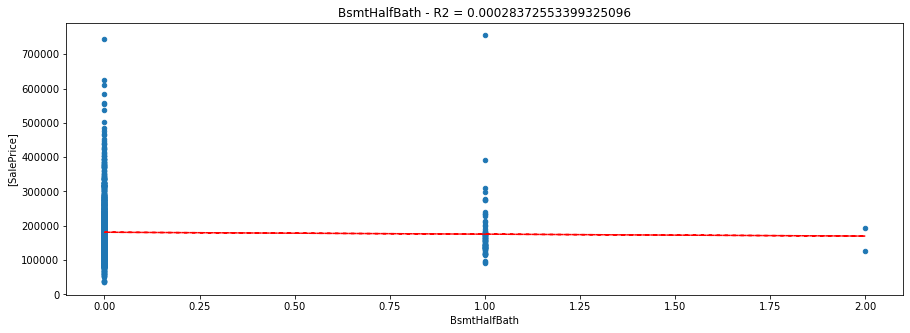

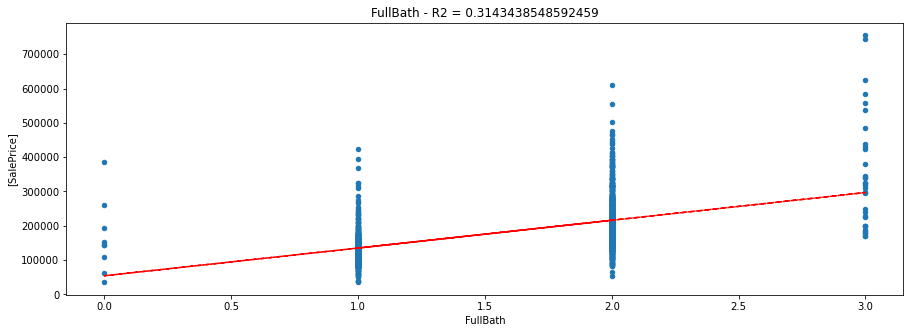

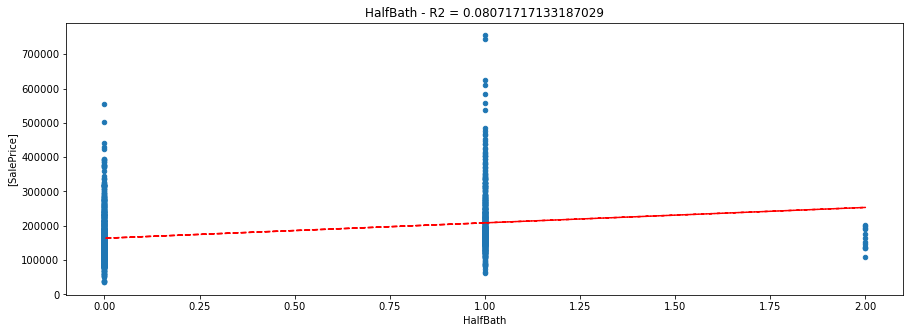

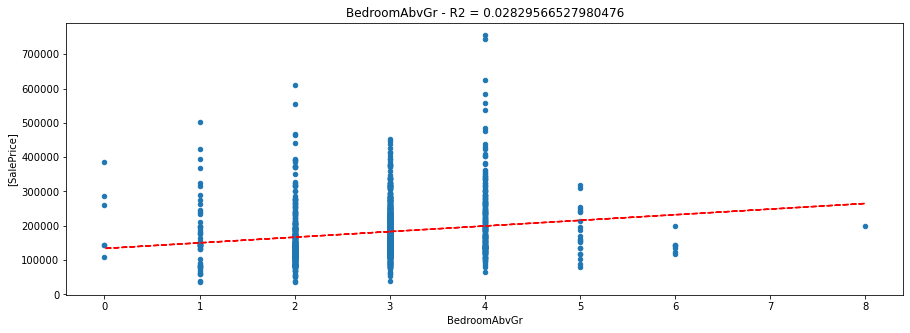

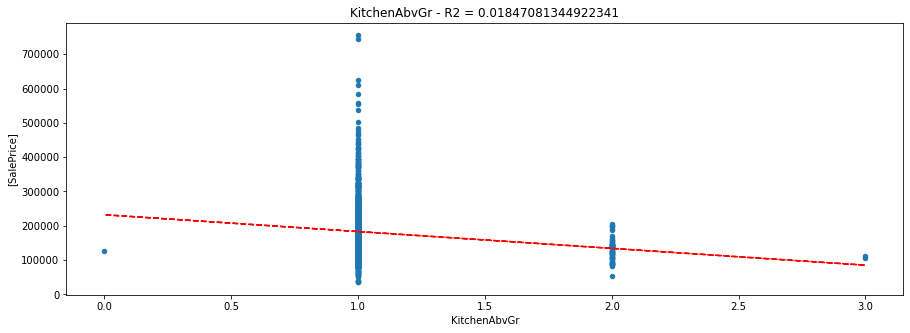

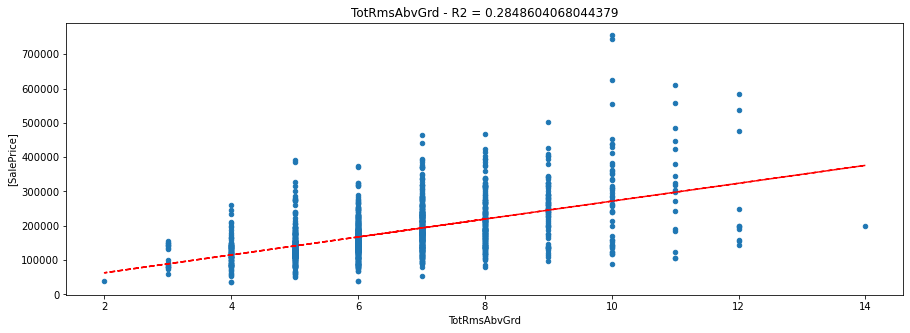

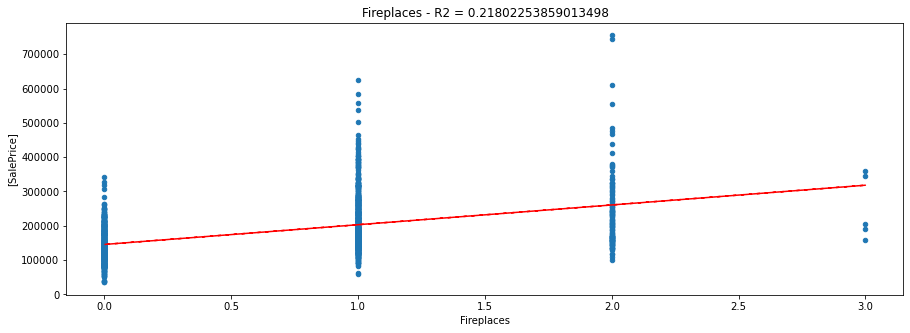

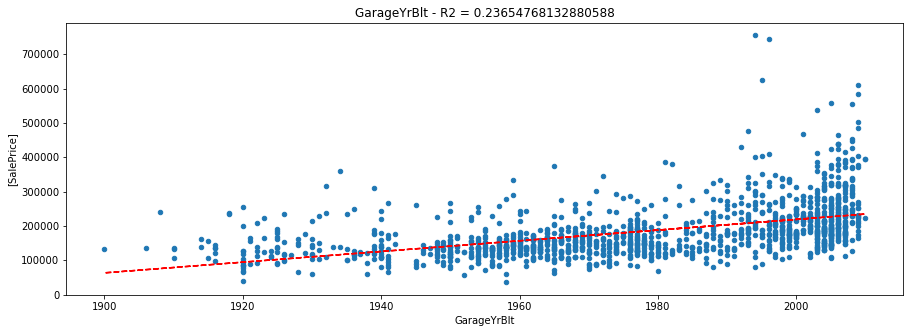

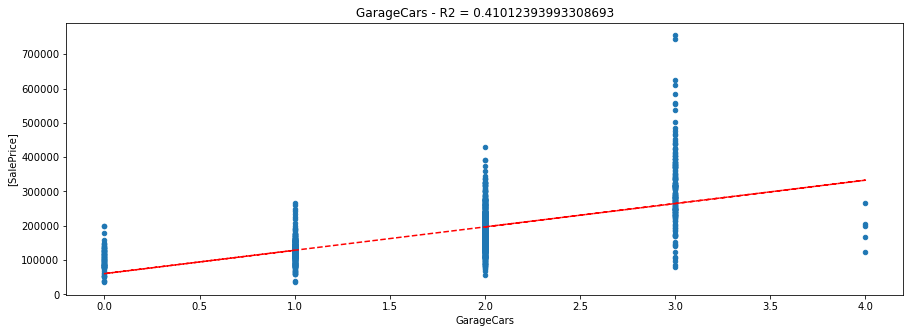

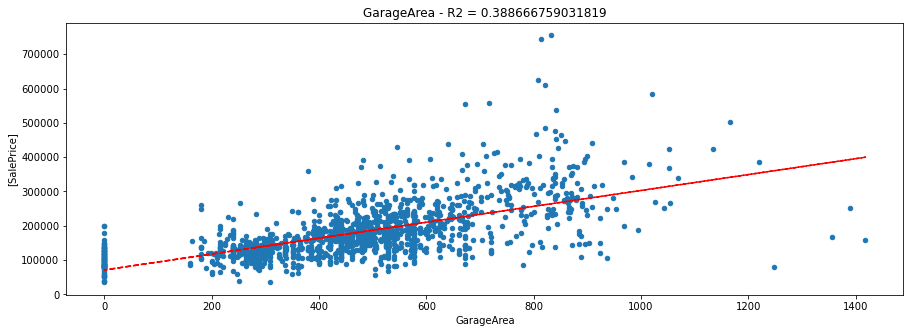

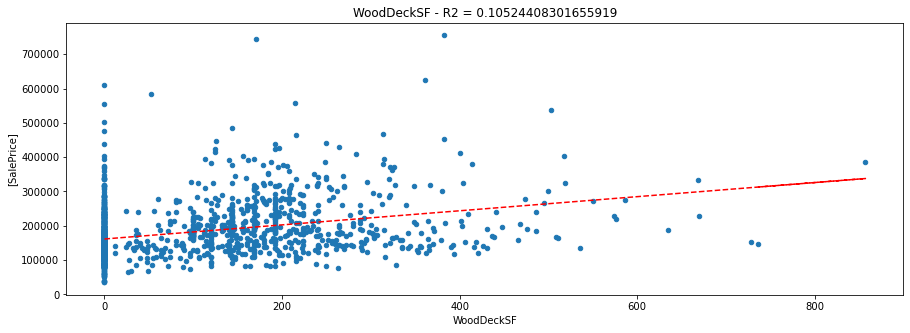

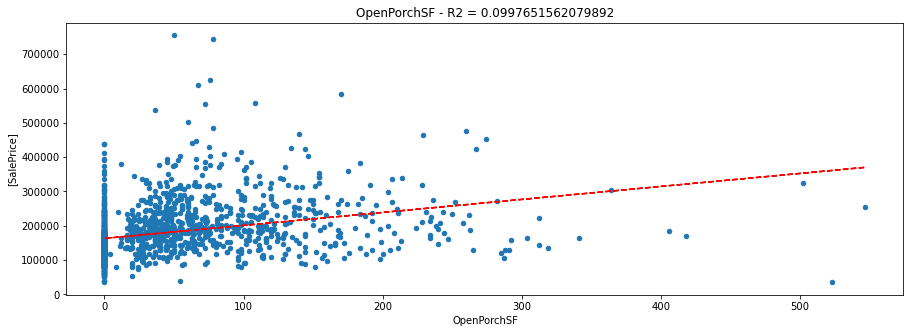

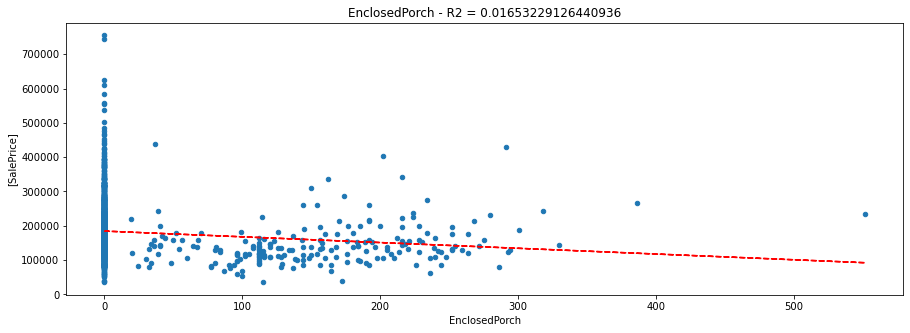

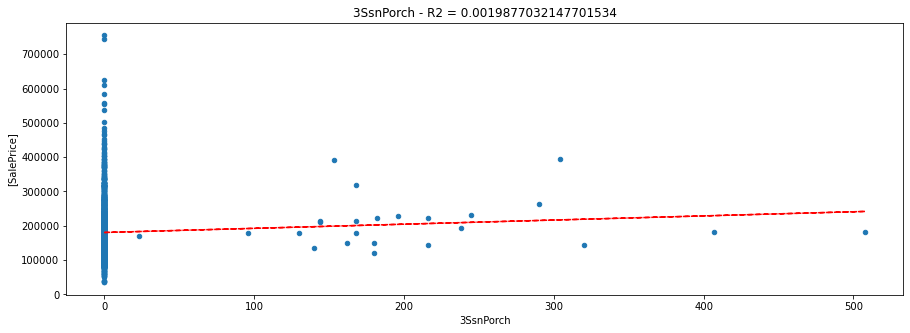

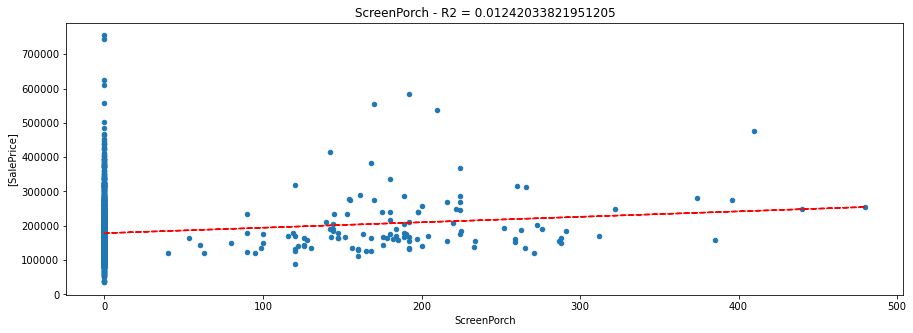

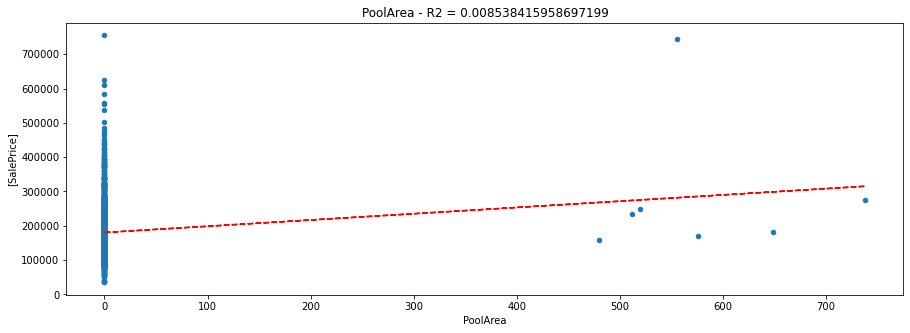

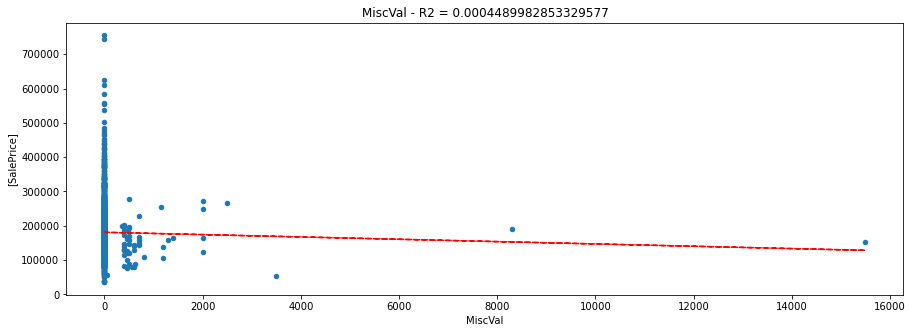

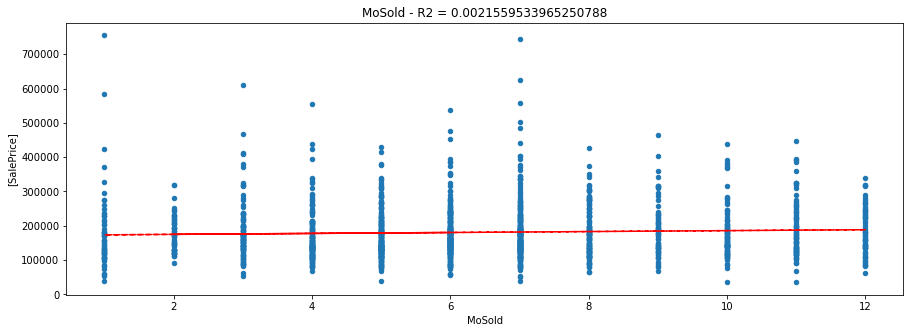

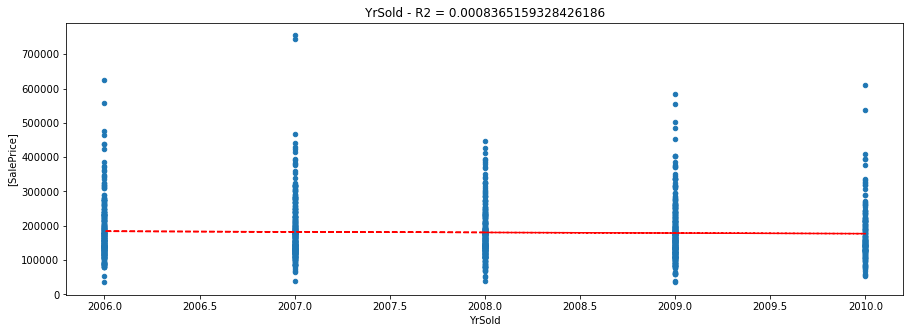

In [32]:
import matplotlib.pyplot as plt 
import numpy as np
from sklearn.metrics import r2_score

for attribute in data_numerical.columns:
    if attribute != "SalePrice" and attribute != "Id":
        data_numerical[data_numerical[attribute].notna()].plot.scatter(y = ["SalePrice"], x = attribute, figsize=(15,5))
        x = data_numerical[data_numerical[attribute].notna()][attribute]
        y = data_numerical[data_numerical[attribute].notna()]["SalePrice"]
        z = np.polyfit(x,y, 1)
        p = np.poly1d(z)
        coefficient_of_dermination = r2_score(y, p(x))
        plt.plot(x,p(x),"r--")
        plt.title(str(attribute) + " - R2 = " + str(coefficient_of_dermination))
        plt.show()

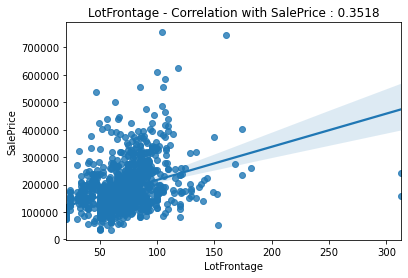

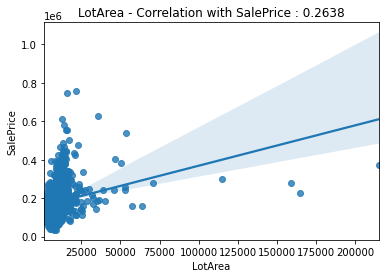

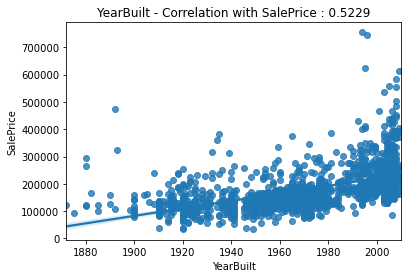

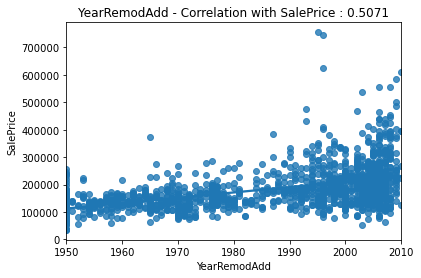

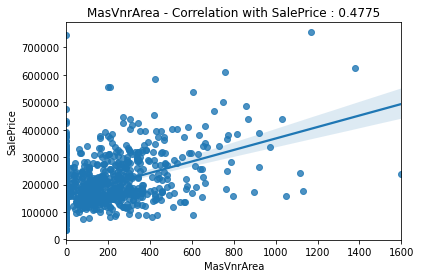

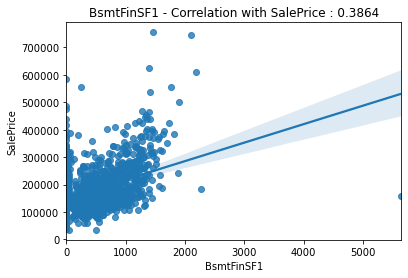

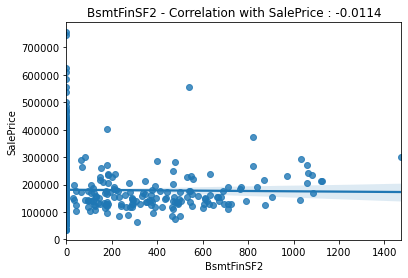

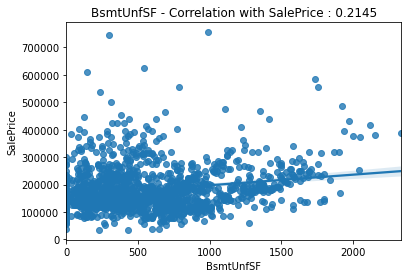

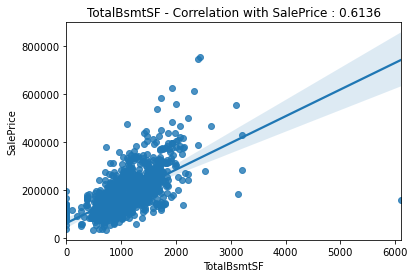

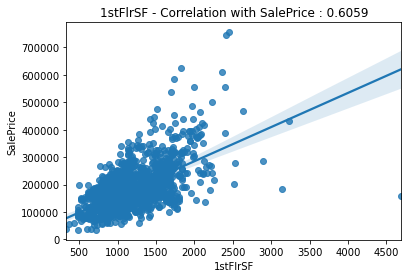

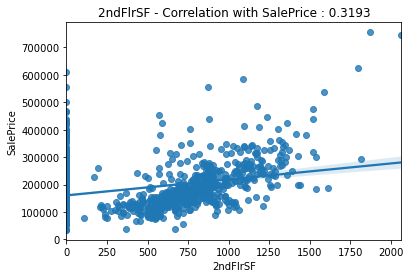

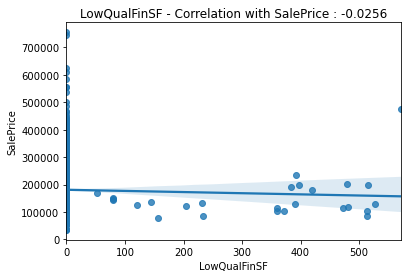

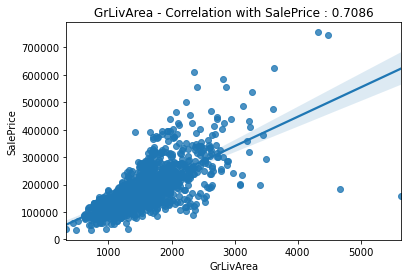

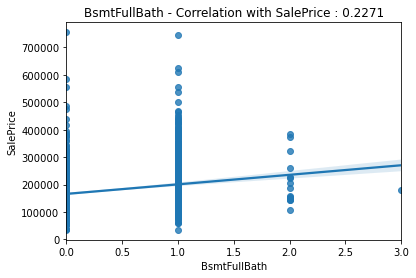

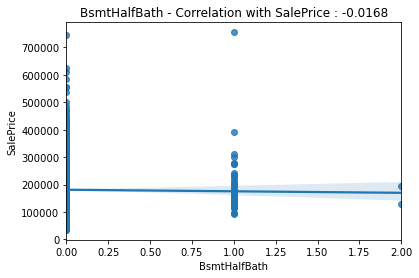

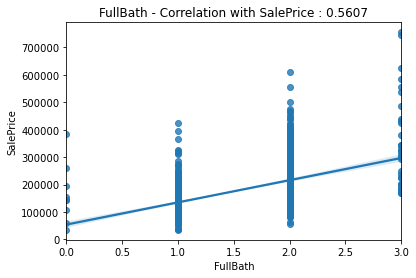

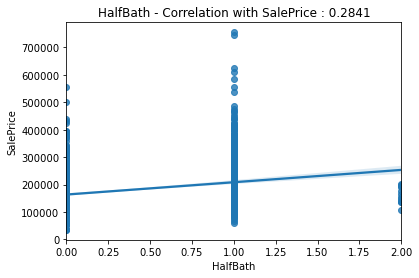

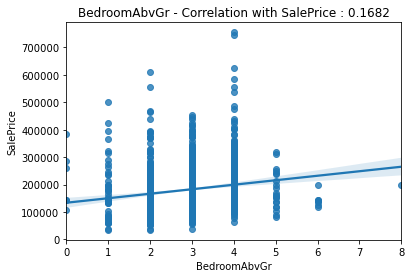

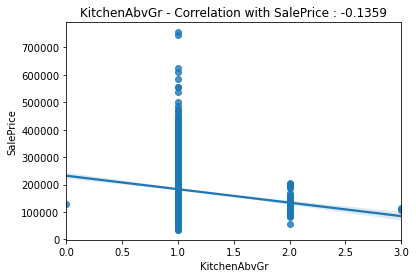

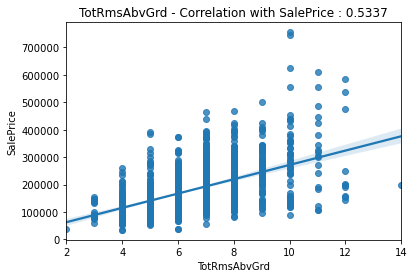

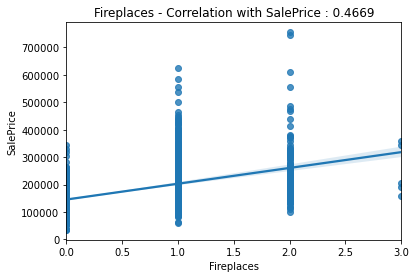

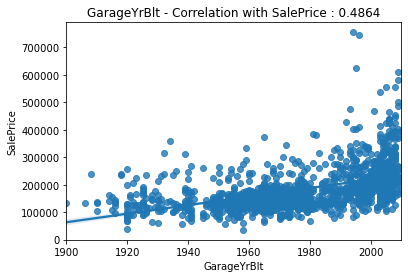

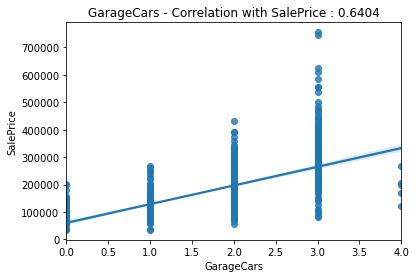

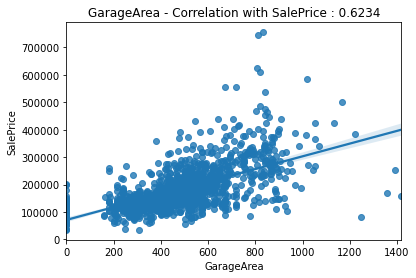

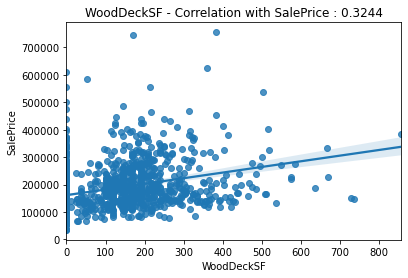

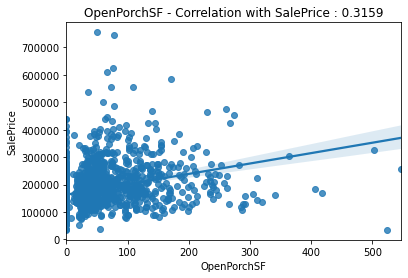

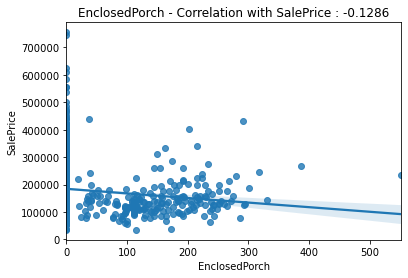

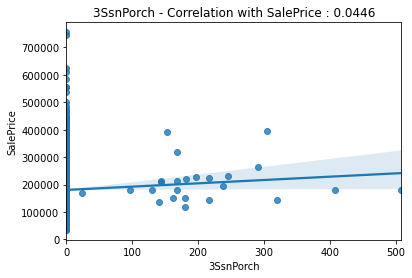

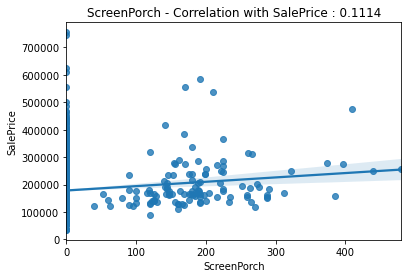

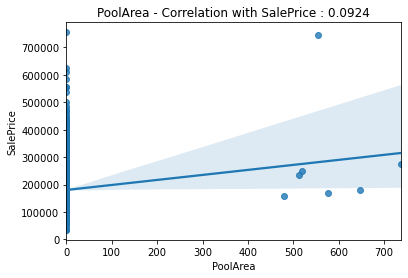

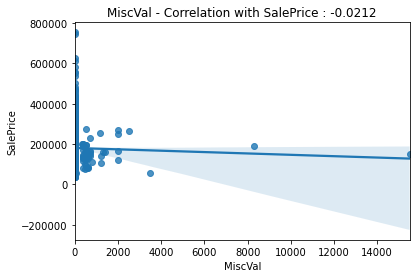

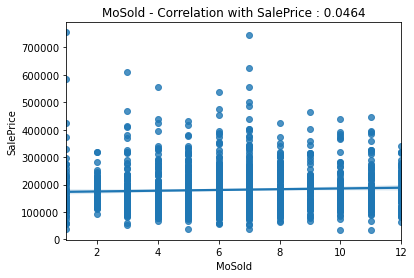

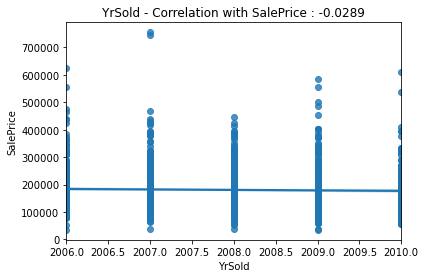

In [41]:
import seaborn as sns

for attribute in data_numerical.columns:
    if attribute != "SalePrice" and attribute != "Id":
        sns.regplot(x=attribute, y='SalePrice', data=data_numerical,ci=95)
        plt.title(str(attribute) + " - Correlation with SalePrice : {:6.4f}".format(data_numerical[attribute].corr(data_numerical['SalePrice'])))
        plt.show()